In [1]:
%pwd

'C:\\Users\\29859'

In [2]:
%cd "D:\桌面文件\大数据管理\pydata-book-3rd-edition\datasets\babynames"

D:\桌面文件\大数据管理\pydata-book-3rd-edition\datasets\babynames


D:\PYTHON\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%pwd

'D:\\桌面文件\\大数据管理\\pydata-book-3rd-edition\\datasets\\babynames'

In [63]:
import pandas as pd
import numpy as np

In [5]:
# 先读取一个txt文件看一下数据集的结构
names1880 = pd.read_csv('yob1880.txt', names = ['name','sex','births'])

In [83]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [8]:
# 读取多个txt文件的方法
# 首先先遍历1880-2011年的txt文件，依次读取后添加到pieces列表中，最后再把列表中的内容合并
pieces=[]
for year in range(1880,2011):
    path=f"yob{year}.txt"
    frame=pd.read_csv(path,names=["names","sex","births"])
    frame["year"]=year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True) # ignore_index=True 用于在合并时重置索引，即不保留原始索引，而是创建一个新的从0开始的整数索引

In [9]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [10]:
total_births = names.pivot_table("births",index="year",columns='sex',aggfunc='sum')

In [11]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [89]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<Axes: title={'center': 'total births by sex and year'}, xlabel='year'>

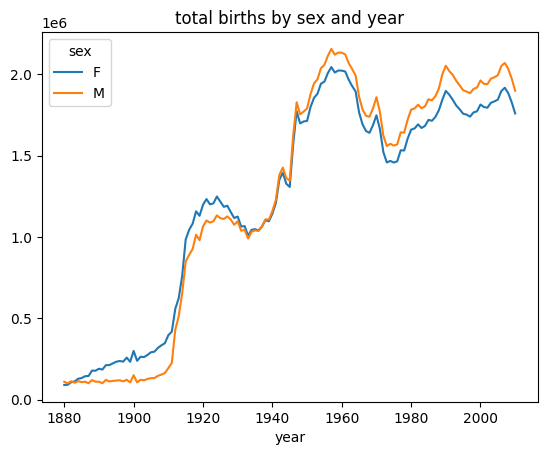

In [12]:
total_births.plot(title="total births by sex and year")

In [13]:
def add_prop(group):
    group["prop"] = group['births']/group['births'].sum()
    return group
# 以年份和性别分组，在每个组中分别计算每一个名字的数量占这一组名字数量的比例
names = names.groupby(["year","sex"]).apply(add_prop,include_groups=False)

In [14]:
names

names  births      prop
year sex                                     
1880 F   0             Mary    7065  0.077643
         1             Anna    2604  0.028618
         2             Emma    2003  0.022013
         3        Elizabeth    1939  0.021309
         4           Minnie    1746  0.019188
...                     ...     ...       ...
2010 M   1690779    Zymaire       5  0.000003
         1690780     Zyonne       5  0.000003
         1690781  Zyquarius       5  0.000003
         1690782      Zyran       5  0.000003
         1690783      Zzyzx       5  0.000003

[1690784 rows x 3 columns]

In [111]:
# 检查一下刚才的比例计算是否在正确
names.groupby(["year","sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [15]:
name=names.reset_index()

In [26]:
name.drop(columns='level_2')

,year,sex,names,births,prop
0,1880,F,Mary,7065,0.077643
1,1880,F,Anna,2604,0.028618
2,1880,F,Emma,2003,0.022013
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188
...,...,...,...,...,...
1690779,2010,M,Zymaire,5,0.000003
1690780,2010,M,Zyonne,5,0.000003
1690781,2010,M,Zyquarius,5,0.000003
1690782,2010,M,Zyran,5,0.000003


In [45]:
# 取排名前1000的名字
def get_top1000(group):
    return group.sort_values("births",ascending=False)[:1000]

In [46]:
grouped = name.groupby(['year','sex'])

In [47]:
# 每个年份每个性别都要抽取取名数排名前1000的数据
top1000=grouped.apply(get_top1000)

C:\Users\29859\AppData\Local\Temp\ipykernel_24440\3248747458.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000=grouped.apply(get_top1000)


In [48]:
top1000.drop(columns='level_2')

year sex      names  births      prop
year sex                                               
1880 F   0        1880   F       Mary    7065  0.077643
         1        1880   F       Anna    2604  0.028618
         2        1880   F       Emma    2003  0.022013
         3        1880   F  Elizabeth    1939  0.021309
         4        1880   F     Minnie    1746  0.019188
...                ...  ..        ...     ...       ...
2010 M   1677639  2010   M     Camilo     194  0.000102
         1677640  2010   M     Destin     194  0.000102
         1677641  2010   M     Jaquan     194  0.000102
         1677642  2010   M     Jaydan     194  0.000102
         1677645  2010   M     Maxton     193  0.000102

[261877 rows x 5 columns]

In [49]:
top1000=top1000.reset_index(drop=True)

In [50]:
top1000

,year,sex,level_2,names,births,prop
0,1880,F,0,Mary,7065,0.077643
1,1880,F,1,Anna,2604,0.028618
2,1880,F,2,Emma,2003,0.022013
3,1880,F,3,Elizabeth,1939,0.021309
4,1880,F,4,Minnie,1746,0.019188
...,...,...,...,...,...,...
261872,2010,M,1677639,Camilo,194,0.000102
261873,2010,M,1677640,Destin,194,0.000102
261874,2010,M,1677641,Jaquan,194,0.000102
261875,2010,M,1677642,Jaydan,194,0.000102


In [53]:
# 把男女分开为两个数据集
boys = top1000[top1000['sex']=='F']
girls = top1000[top1000['sex']=='M']

In [54]:
boys,girls

(        year sex  level_2      names  births      prop
 0       1880   F        0       Mary    7065  0.077643
 1       1880   F        1       Anna    2604  0.028618
 2       1880   F        2       Emma    2003  0.022013
 3       1880   F        3  Elizabeth    1939  0.021309
 4       1880   F        4     Minnie    1746  0.019188
 ...      ...  ..      ...        ...     ...       ...
 260872  2010   F  1657943    Violeta     250  0.000142
 260873  2010   F  1657942     Leilah     250  0.000142
 260874  2010   F  1657941    Alaysia     250  0.000142
 260875  2010   F  1657945      Dania     249  0.000142
 260876  2010   F  1657946     Yadira     249  0.000142
 
 [130880 rows x 6 columns],
         year sex  level_2    names  births      prop
 942     1880   M      942     John    9655  0.087381
 943     1880   M      943  William    9533  0.086277
 944     1880   M      944    James    5927  0.053641
 945     1880   M      945  Charles    5348  0.048401
 946     1880   M      946  

In [56]:
total_births = top1000.pivot_table("births",index="year",columns="names",aggfunc=sum)

C:\Users\29859\AppData\Local\Temp\ipykernel_24440\1352923090.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births",index="year",columns="names",aggfunc=sum)


In [57]:
# 取男女中取名数排名前二的名字
subset = total_births[['Mary','Anna','John','William']]

In [58]:
subset

names,Mary,Anna,John,William
year,,,,
1880,7092.0,2616.0,9701.0,9563.0
1881,6948.0,2714.0,8795.0,8554.0
1882,8179.0,3143.0,9597.0,9329.0
1883,8044.0,3322.0,8934.0,8427.0
1884,9253.0,3880.0,9427.0,8931.0
...,...,...,...,...
2006,4073.0,8590.0,15140.0,18915.0
2007,3665.0,7866.0,14405.0,18839.0
2008,3478.0,7236.0,13273.0,18337.0


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

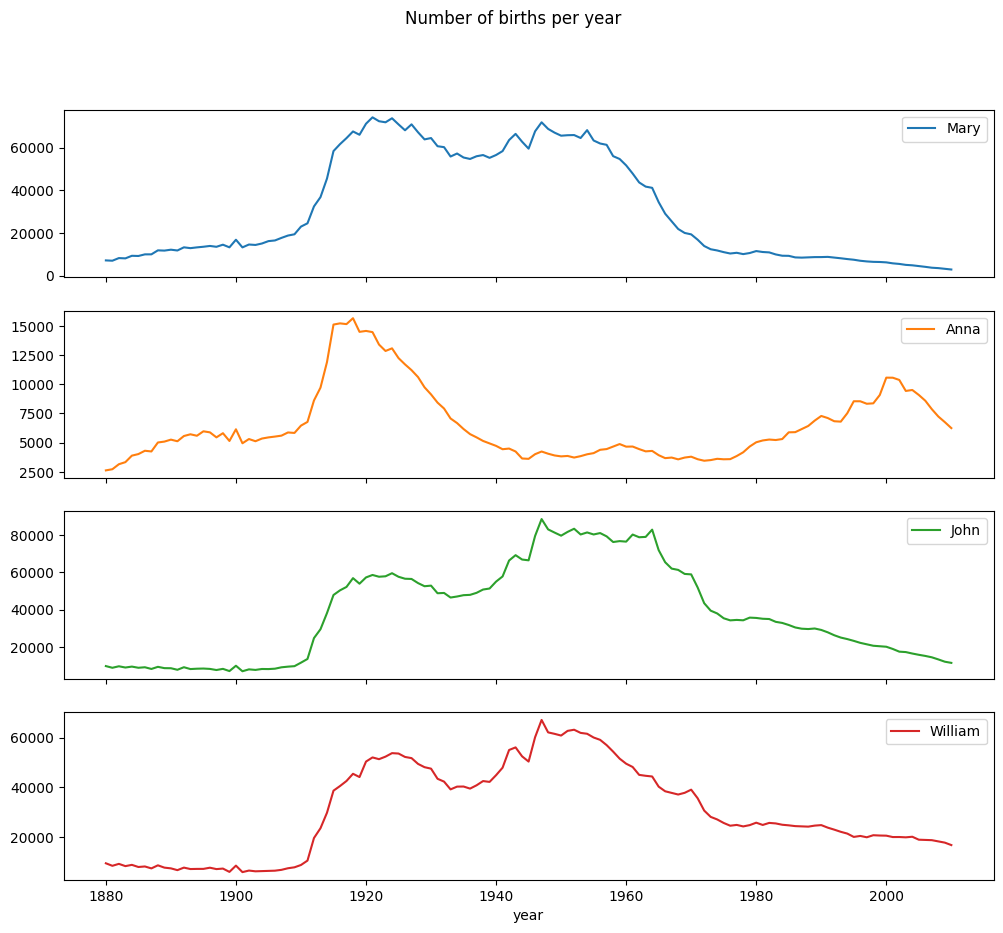

In [59]:
subset.plot(subplots=True,figsize=(12,10),title="Number of births per year") # subplots=True表明每个子集（通常是列）创建单独的子图，反正就是每一列的数据都画在一个图中

In [60]:
# 查看两种性别排名前1000的名字的数量的总体占比的变化趋势
table = top1000.pivot_table("prop",index="year",columns="sex",aggfunc=sum)

C:\Users\29859\AppData\Local\Temp\ipykernel_24440\184973645.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop",index="year",columns="sex",aggfunc=sum)


<Axes: title={'center': 'sum of table1000.prop by year and sex'}, xlabel='year'>

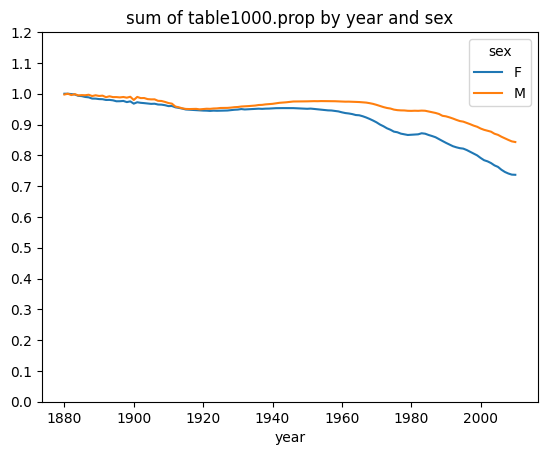

In [64]:
table.plot(title = "sum of table1000.prop by year and sex",yticks=np.linspace(0,1.2,13))

In [69]:
# 这个函数的作用是找出累计百分比正好达到50%的那个值的索引（即这个值及之前的值的占比加起来等于50%）
def get_quantile_count(name,q=0.5):
    name = name.sort_values("prop",ascending=False)
    return name.prop.cumsum().searchsorted(q)+1

diversity= top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

C:\Users\29859\AppData\Local\Temp\ipykernel_24440\1917498534.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity= top1000.groupby(['year','sex']).apply(get_quantile_count)


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [70]:
diversity=diversity.unstack()
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'number of popular names in top 50%'}, xlabel='year'>

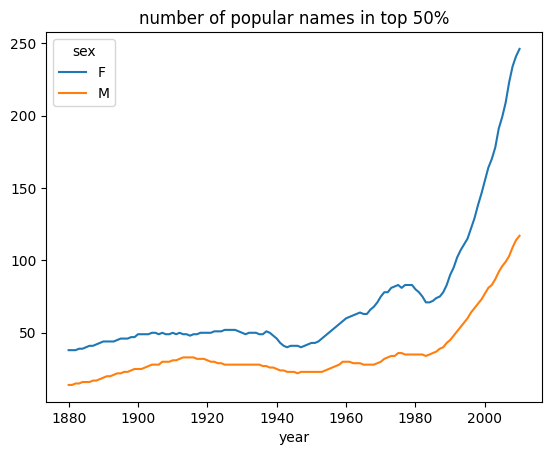

In [71]:
diversity.plot(title="number of popular names in top 50%")

百分比的变化说明人们取名字的多样性的增加，取名不再聚焦于那些大众化，出名的名字，而是有了自己的独特性

In [76]:
def get_last_letter(x):
    return x[-1]

last_letters = name["names"].map(get_last_letter)
last_letters.name ="last_letter"
table = name.pivot_table("births", index=last_letters,columns=['sex','year'],aggfunc=sum)

C:\Users\29859\AppData\Local\Temp\ipykernel_24440\2094757907.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = name.pivot_table("births", index=last_letters,columns=['sex','year'],aggfunc=sum)


In [79]:

subtable =table.reindex(columns=[1910,1960,2010],level="year") # reindex 方法被用来从 table 中选择索引级别为 "year" 且年份为1910、1960、2010的列
subtable.head(10)

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0

In [82]:
subtable.sum(axis=0)

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [85]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

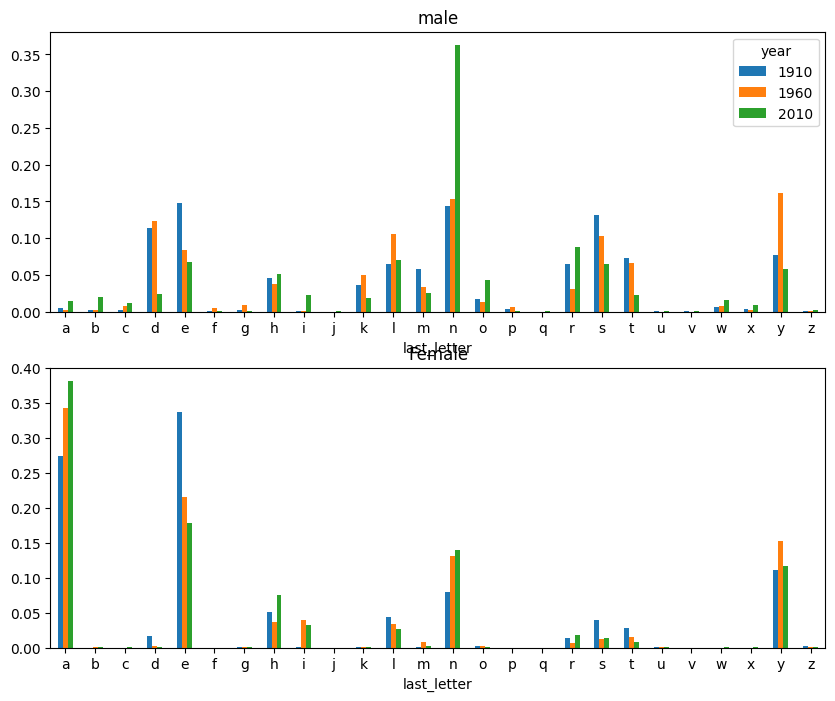

In [89]:

import matplotlib.pyplot as plt
fig, axes =plt.subplots(2,1,figsize=(10,8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="male")
letter_prop["F"].plot(kind="bar",rot=0, ax=axes[1],title="Female",legend=False)

In [92]:
all_names = pd.Series(top1000["names"].unique())
lesley_like = all_names[all_names.str.contains("lesl")]


Series([], dtype: object)

In [93]:
lesley_like

Series([], dtype: object)